# Project: Wine_Quality_Dataset_Investegate!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




> **Descriptions:** The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


 **Dataset columns description:**

- **fixed acidity**
- **volatile acidity**
- **citric acid**
- **residual sugar**
- **chlorides**
- **free sulfur dioxide**
- **total sulfur dioxide**
- **density**
- **pH**
- **sulphates**
- **alcohol** 
- **quality**: Wine quality (score between 0 and 10).


<h4><center>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.</center></h1>
 


## **Questions:**


* 1 - Which wine associated with better quality red wine or white wine?
* 2 - What is the properties that associated with high quality wine?
* 3 - What is the properties that associated with low quality wine?
* 4 - Do wines with higher alcohol level have higher quality?
* 5 - Do wines with higher residual sugar level have higher quality?
* 6 - Do wines with higher pH level have higher quality?
* 7 - Is there any correlation between density and quality?
* 8 - Is there any correlation between alcohol and quality?
* 9 - Is there any correlation between alcohol and density?
* 10 - Is there any correlation between pH and quality?

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [2]:
# loading CSV files into 2 Dataframes  //red_wine and white_wine//

red_wine = pd.read_csv("winequality-red.csv", sep=(";"))
white_wine = pd.read_csv("winequality-white.csv", sep=(";"))

In [3]:
#checking 5 rows sample from Dataframes

red_wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
674,10.8,0.400,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6
1561,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
469,8.7,0.820,0.02,1.2,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5
729,6.4,0.865,0.03,3.2,0.071,27.0,58.0,0.99500,3.61,0.49,12.7,6


In [4]:
white_wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2450,6.6,0.56,0.15,10.0,0.037,38.0,157.0,0.99642,3.28,0.52,9.4,5
3346,6.7,0.18,0.24,10.3,0.057,64.0,185.0,0.99519,3.12,0.50,10.6,6
747,7.2,0.29,0.40,7.6,0.024,56.0,177.0,0.99280,3.04,0.32,11.5,6
986,7.4,0.28,0.30,5.3,0.054,44.0,161.0,0.99410,3.12,0.48,10.3,6
2661,7.2,0.30,0.26,1.5,0.041,46.0,178.0,0.99154,3.19,0.56,11.3,6


### Assessing Data

In [5]:
#checking Dataframes basic informations (columns names, number of values, data types ......)

red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
#checking Dataframes shape (number of rows and columns)

red_wine.shape

(1599, 12)

In [8]:
white_wine.shape

(4898, 12)

In [9]:
#checking more information and descriptive statistics

red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
# checking for NaN values 

red_wine.isnull().sum().sum()

0

In [12]:
white_wine.isnull().sum().sum()

0

In [13]:
#checking for duplicated rows 

red_wine.duplicated().sum()

240

In [14]:
# checking for duplicated with subset 

white_wine.duplicated().sum()

937

##  Cleaning Data


### <font color='blue'>Tidiness issues</font>

1. There is no column to identify wine colour for each sample.
2. There is two separate dataframes should be merged in one dataframe.

### <font color='blue'>Quality issues</font>

1. Space in columns names should be replaced with "_".
2. There is duplicate values on both dataframes.

In [15]:
# make copy of origenal dataframes to clean them
red_wine_clean = red_wine.copy()
white_wine_clean = white_wine.copy()

### <font color='blue'>Tidiness issues</font>

#### 1. There is no column to identify wine colour for each sample.

##### Solution
* Add new column `color` to red_wine table.
* Add new column `color` to white_wine table.

##### Code

In [16]:
# Add new column color 

red_wine_clean["color"] = "red"
white_wine_clean["color"] = "white"

##### Test

In [17]:
# check new column already added

red_wine_clean.color.sample(5) , white_wine_clean.color.sample(5)

(1121    red
 215     red
 558     red
 1468    red
 1581    red
 Name: color, dtype: object,
 3396    white
 865     white
 316     white
 2879    white
 2809    white
 Name: color, dtype: object)

#### 2. There is two separate dataframes should be merged in one dataframe.

##### Solution
* Merge both dataframes into one dataframe called `all_wine` using `.append()` method.

##### Code

In [18]:
#Merge both dataframes

all_wine = red_wine_clean.append(white_wine_clean)

##### Test

In [19]:
# check dataframes already merged

all_wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
3199,6.8,0.21,0.40,6.3,0.032,40.0,121.0,0.99214,3.18,0.53,12.0,7,white
74,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8,white
4629,5.6,0.24,0.34,2.0,0.041,14.0,73.0,0.98981,3.04,0.45,11.6,7,white
1374,6.9,0.23,0.34,2.7,0.032,24.0,121.0,0.99020,3.14,0.38,12.4,7,white
25,7.0,0.25,0.32,9.0,0.046,56.0,245.0,0.99550,3.25,0.50,10.4,6,white


### <font color='blue'>Quality issues</font>

#### 1. Space in columns names should be replaced with "_".

##### Solution
* Relace space with "_" using `.rename() and lambda` functions

##### Code

In [20]:
# Relace space with "_" 

all_wine.rename(columns = lambda x : x.replace(" ","_"), inplace = True)

##### Test

In [21]:
# confirm columns names already changed

all_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

#### 2.  There is duplicate values on both dataframes.

##### Solution
* Merged dataframe has 1177 duplicate values but we dont have any indecation can tell this is already a duplicated data or different samples has exact same numbers so we are going to leave it without any change.

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


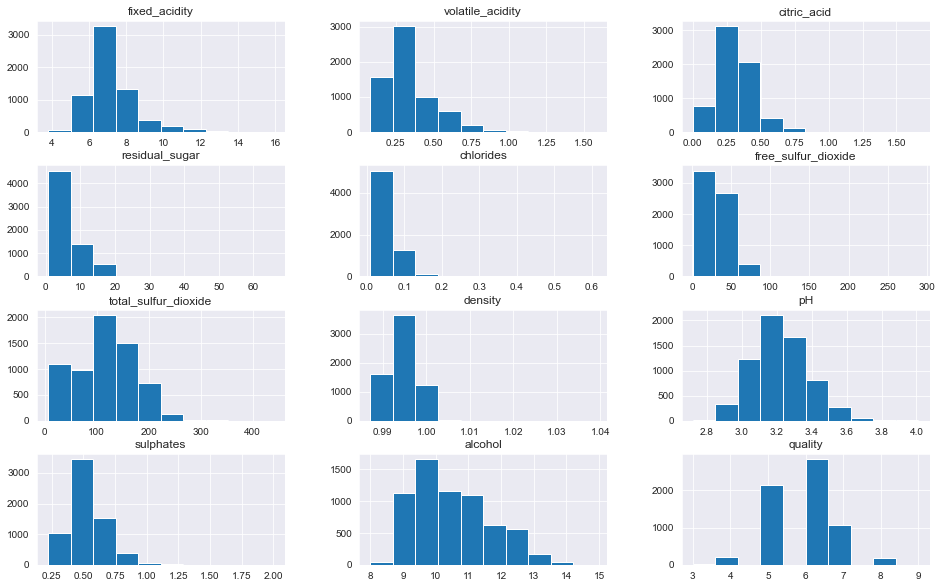

In [22]:
# cheking skweniss 

all_wine.hist(figsize=(16,10)); 

**(From above visualisation we can see that alcohol, fixed acidity and volatile acidity shapes are right skewed)**

### Research Question 1
> ####   Which wine associated with better quality red wine or white wine?

In [23]:
# Check mean quality for red and white wine

all_wine.groupby("color")["quality"].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

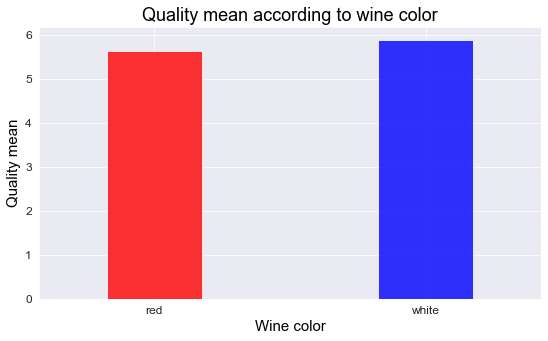

In [24]:
# Quality according to wine color in bar chart

all_wine.groupby("color")["quality"].mean().plot(kind="bar",
                                                 rot = 0,
                                                 width = 0.35,
                                                 color=["red", "blue"],
                                                 alpha = 0.8,
                                                 fontsize = 12,
                                                 figsize=(9,5)
                                                )


plt.ylabel("Quality mean",fontsize=15, color="k")
plt.xlabel("Wine color",fontsize=15, color="k")
plt.title("Quality mean according to wine color", fontsize=18, color="k");

### Answer 1
* From above visualisation we can conclude there is no deference to concider between red wine quality mean and white wine quality mean.

   
**(Wine color doesn't affect quality.)**


### Research Question 2
> ####  What is the properties that associated with high quality wine?

In [25]:
# check wine quality [minimum, first quartile, median and maximum]

all_wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [26]:
# check high quality wine (the wine with quality more than third quartile)

high_quality_wine = all_wine[all_wine.quality > 6]
high_quality_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,red
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7,red
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7,red
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870,6.1,0.32,0.28,6.6,0.021,29.0,132.0,0.99188,3.15,0.36,11.45,7,white
4876,6.2,0.38,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.60,7,white
4886,6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7,white
4887,6.2,0.41,0.22,1.9,0.023,5.0,56.0,0.98928,3.04,0.79,13.00,7,white


In [27]:
# properties that associated with high quality wine

high_quality_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,7.085709,0.28917,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966
std,1.342832,0.11696,0.110040,4.063824,0.021014,15.344154,47.126201,0.003007,0.159094,0.161521,1.215620,0.376348
min,3.900000,0.08000,0.000000,0.800000,0.012000,3.000000,7.000000,0.987110,2.840000,0.220000,8.500000,7.000000
25%,6.300000,0.20000,0.280000,1.800000,0.033000,20.000000,87.000000,0.990720,3.120000,0.420000,10.700000,7.000000
50%,6.900000,0.27000,0.320000,2.900000,0.039000,31.000000,114.000000,0.992280,3.220000,0.510000,11.500000,7.000000
75%,7.400000,0.34000,0.380000,6.500000,0.051000,40.000000,140.000000,0.995000,3.340000,0.640000,12.400000,7.000000
max,15.600000,0.91500,0.760000,19.250000,0.358000,108.000000,289.000000,1.003200,3.820000,1.360000,14.200000,9.000000


### Answer 2

* From above table we can see all properties that associated with high quality wine.

### Research Question 3

> ####  What is the properties that associated with low quality wine?

In [28]:
# check low quality wine (the wine with quality less than first quartile)

low_quality_wine = all_wine[all_wine.quality < 5]
low_quality_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4,red
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,red
41,8.8,0.610,0.30,2.80,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,4,red
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,red
73,8.3,0.675,0.26,2.10,0.084,11.0,43.0,0.99760,3.31,0.53,9.2,4,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,4,white
4779,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,4,white
4804,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,4,white
4839,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,4,white


In [29]:
# properties that associated with low quality wine

low_quality_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049
std,1.341550,0.245677,0.180734,3.937832,0.049298,27.846530,69.436766,0.002532,0.191313,0.160115,0.999035,0.327897
min,4.200000,0.110000,0.000000,0.700000,0.013000,3.000000,7.000000,0.989200,2.740000,0.250000,8.000000,3.000000
25%,6.500000,0.280000,0.140000,1.500000,0.040250,7.000000,50.250000,0.993105,3.090000,0.400000,9.400000,4.000000
50%,7.100000,0.380000,0.270000,2.200000,0.051000,15.000000,102.000000,0.995010,3.225000,0.490000,10.050000,4.000000
75%,8.075000,0.610000,0.380000,5.600000,0.068000,28.750000,158.500000,0.996800,3.360000,0.570000,10.900000,4.000000
max,12.500000,1.580000,1.000000,17.550000,0.610000,289.000000,440.000000,1.001000,3.900000,2.000000,13.500000,4.000000


### Answer 3

* From above table we can see all properties that associated with low quality wine.

### Research Question 4

> ####  Do wines with higher alcohol level have higher quality?

**(to identify samples with higher alcohol level I am going to add new column"alcohol_level" levels ["low","medium","high","very_hight] using `.cut()`method) then i will drop it**

In [30]:
# chek alcohol column desvriptive statistics info

all_wine.alcohol.describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [31]:
the_labels = ["low","medium","high", "very_high"]
bins = [8, 9.5, 10.3, 11.3, 14.9+1]
all_wine["alcohol_level"] = pd.cut(all_wine.alcohol, bins,labels = the_labels, right=False)
all_wine


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,alcohol_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,high
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,low
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,very_high


In [32]:
all_wine.groupby("alcohol_level")["quality"].mean()

alcohol_level
low          5.444518
medium       5.504187
high         5.894052
very_high    6.384525
Name: quality, dtype: float64

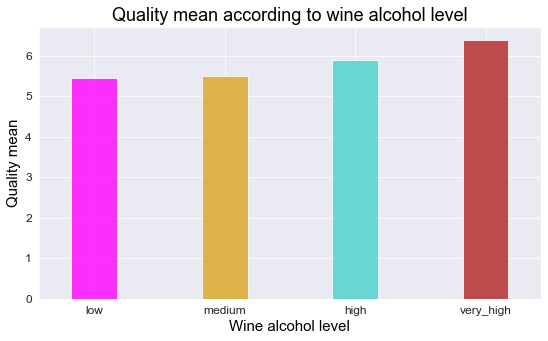

In [33]:
all_wine.groupby("alcohol_level")["quality"].mean().plot(kind="bar",
                                                         rot = 0,
                                                         width = 0.35,
                                                         color=["magenta", "goldenrod","mediumturquoise","firebrick"],
                                                         alpha = 0.8,
                                                         fontsize = 12,
                                                         figsize=(9,5)
                                                         )


plt.ylabel("Quality mean",fontsize=15, color="k")
plt.xlabel("Wine alcohol level",fontsize=15, color="k")
plt.title("Quality mean according to wine alcohol level", fontsize=18, color="k");

In [34]:
# drop alcohol level column 
all_wine.drop("alcohol_level", axis = 1, inplace = True)
all_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

### Answer 4

* From above visualisation we can conclude that wine samples with higher alcohol level have higher quality. The quality mean difference isn't high so to be sure this conclusion we need to check the correlation between alcohol and quality.

### Research Question 5

> ####  Do wines with higher residual sugar level have higher quality?

**(to identify samples with higher residual sugar level I am going to add new column"sugar_level" levels ["low","medium","high", "very_high"] using `.cut()`method) then i will drop it**

In [35]:
# chek residual_sugar column desvriptive statistics info

all_wine.residual_sugar.describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual_sugar, dtype: float64

In [36]:
# add new column "sugar_level"

the_labels = ["low","medium","high", "very_high"]
bins = [0.60, 1.8, 3, 8.1, 65.8+1]
all_wine["sugar_level"] = pd.cut(all_wine.residual_sugar, bins,labels = the_labels, right=False)
all_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,sugar_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,low
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,high
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,low
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,low


In [37]:
all_wine.groupby("sugar_level")["quality"].mean()

sugar_level
low          5.792683
medium       5.822387
high         5.907191
very_high    5.749239
Name: quality, dtype: float64

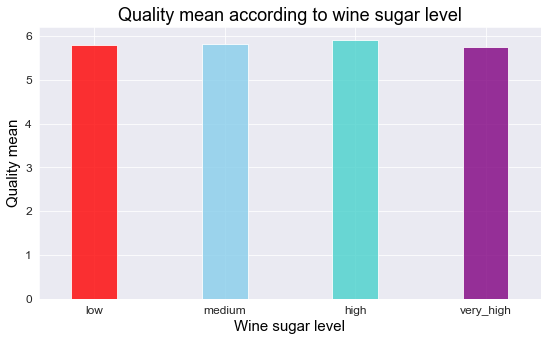

In [38]:
# Quality mean according to wine sugar level bar chart

all_wine.groupby("sugar_level")["quality"].mean().plot(kind="bar",
                                                       rot = 0,
                                                       width = 0.35,
                                                       color=["red","skyblue","mediumturquoise","purple"],
                                                       alpha = 0.8,
                                                       fontsize = 12,
                                                       figsize=(9,5)
                                                       )


plt.ylabel("Quality mean",fontsize=15, color="k")
plt.xlabel("Wine sugar level",fontsize=15, color="k")
plt.title("Quality mean according to wine sugar level", fontsize=18, color="k");

In [39]:
# drop sugar  level column 
all_wine.drop("sugar_level", axis = 1, inplace = True)
all_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

### Answer 5

* From above visualisation we can conclude that the quality mean for samples with all residual sugar levels approximately the same. There is no difference to consider.

### Research Question 6

> #### Do wines with higher pH level have higher quality?

**(to identify samples with higher pH level I am going to add new column"pH_level" levels ["low","medium","high", "very_high"] using `.cut()`method) then i will drop it**

In [40]:
# chek pH column desvriptive statistics info

all_wine.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [41]:
# add new column "pH_level"

the_labels = ["low","medium","high", "very_high"]
bins = [2.72, 3.11, 3.21, 3.32, 4.01+1]
all_wine["pH_level"] = pd.cut(all_wine.pH, bins,labels = the_labels, right=False)
all_wine.pH_level.isnull().sum()

0

In [42]:
all_wine.groupby("pH_level")["quality"].mean()

pH_level
low          5.785850
medium       5.782028
high         5.839949
very_high    5.863930
Name: quality, dtype: float64

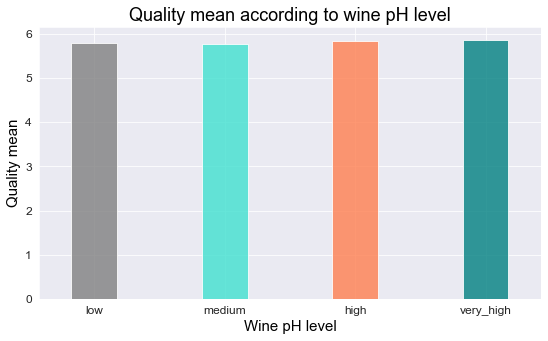

In [43]:
# Quality mean according to wine sugar level bar chart

all_wine.groupby("pH_level")["quality"].mean().plot(kind="bar",
                                                     rot = 0,
                                                     width = 0.35,
                                                     color=["gray","turquoise","coral","teal"],
                                                     alpha = 0.8,
                                                     fontsize = 12,
                                                     figsize=(9,5)
                                                     )


plt.ylabel("Quality mean",fontsize=15, color="k")
plt.xlabel("Wine pH level",fontsize=15, color="k")
plt.title("Quality mean according to wine pH level", fontsize=18, color="k");

In [44]:
# drop pH level column 

all_wine.drop("pH_level", axis = 1, inplace = True)
all_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

### Answer 6

*  From above visualisation we can conclude that the quality mean for samples with all pH levels approximately the same. There is no difference to consider.

### Research Question 7

> ####  Is there any correlation between density and quality?

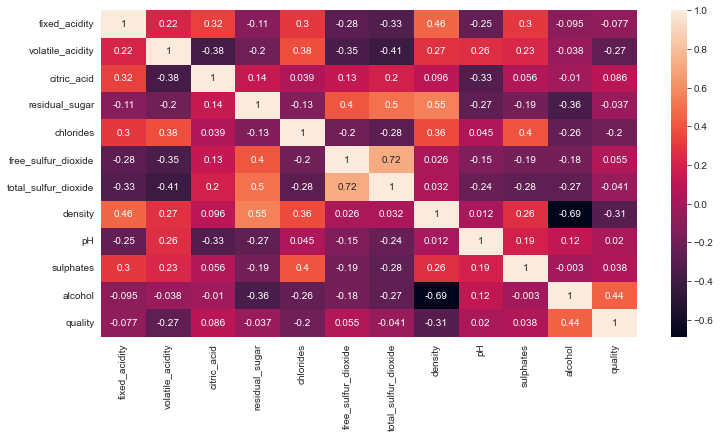

In [45]:
# first I am going to check correlatio heatmap 

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(all_wine.corr(), annot=True, ax=ax);

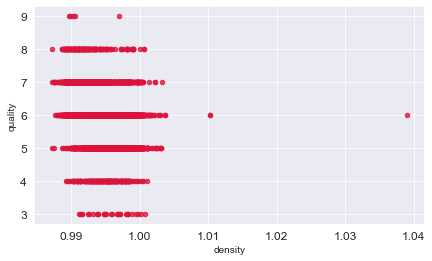

In [46]:
# Scatter plot between density and quality 

all_wine.plot(kind="scatter",
                  rot = 0,
                  x = 'density',
                  y = 'quality',
                  color=["crimson"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

### Answer 7

* From above visualisation we can see that there is no correlation to consider between density and quality.

### Research Question 8

> ####  Is there any correlation between alcohol and quality?

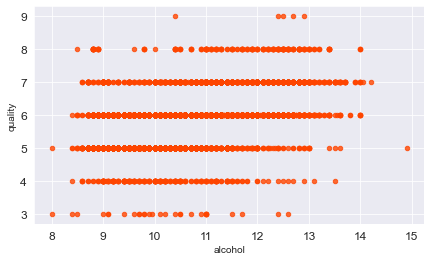

In [47]:
# Scatter plot between alcohol and quality 

all_wine.plot(kind="scatter",
                  rot = 0,
                  x = 'alcohol',
                  y = 'quality',
                  color=["orangered"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

### Answer 8

* From above visualisation we can see that there is a positive correlation between alcohol and quality.

**(Wine samples with high alcohol level have a very good chance to have high quality rate)**

### Research Question 9

> ####  Is there any correlation between alcohol and density?

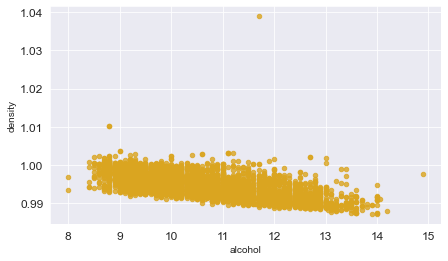

In [48]:
# Scatter plot between alcohol and density 

all_wine.plot(kind="scatter",
                  rot = 0,
                  x = 'alcohol',
                  y = 'density',
                  color=["goldenrod"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

### Answer 9

* From above visualisation we can see that there is a very strong negative correlation between alcohol level and density. 

**(Wine samples with high alcohol level have low density)**

### Research Question 10

> ####  Is there any correlation between pH and quality?

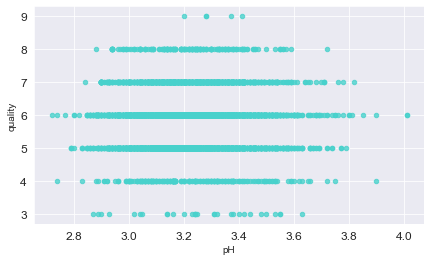

In [49]:
# Scatter plot between pH and quality 

all_wine.plot(kind="scatter",
                  rot = 0,
                  x = 'pH',
                  y = 'quality',
                  color=["mediumturquoise"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

### Answer 10

* From above visualisation we can see that there is no correlation to consider between pH and quality.
   

<a id='conclusions'></a>
## Conclusions


**1. Wine color doesn't affect quality.**

**2. There is a positive correlation between alcohol and quality so Wine samples with high alcohol level have a very good chance to have high quality rate)**

**3. There is a very strong negative correlation between alcohol level and density.**

**4. There is no correlation to consider between residual sugar and quality so residual sugar level dosen't affect quality.**

**5. There is no correlation to consider between pH and quality so pH level dosen't affect quality.**

**6. There is no correlation to consider between density and quality so density level dosen't affect quality.**

**7. There is no correlation to consider between pH and quality.**

**8. alcohol, fixed acidity and volatile acidity shapes are right skewed.**


#### > We can conclude that the important metrics in this dataset are:

> **A. alcohol because it affects wine quality.**

> **B. density because it affects alcohol which affect wine quality.**
